# Distributions of input variables
Look at all the BDT input variables.

## Initalization

In [1]:
from bdt_training_scikit_tools import load_default_samples
import matplotlib.pyplot as plt
plt.rc('font', size=14)
from matplotlib.colors import LogNorm
import pandas as pd
import numpy as np

## Load Data Samples

In [2]:
default_cut_Lxy = 1250
default_cut_Lz = 3500
eta_seperator_cut = 1.4
def trim_sample(sample, cut_Lxy = default_cut_Lxy, cut_Lz = default_cut_Lz):
    '''Trim lxy and lz cuts for a sample'''
    return sample[((abs(sample.JetEta) > eta_seperator_cut) & (sample.mc_Lz*1000 > cut_Lz)) | ((abs(sample.JetEta) <= eta_seperator_cut) & (sample.mc_Lxy*1000 > cut_Lxy))]

def trim_samples(all_events):
    '''Trim default lxy and lz cuts for a tuple of (mj, bib, signal) samples'''
    return (all_events[0], all_events[1], trim_sample(all_events[2]))

In [3]:
sample_name_key = {}
samples = {}
def load_trimmed_sample(jobNo, description):
    '''Load and trim a sample from a job, and record it in our sample archive'''
    print ('{0} - {1}'.format(jobNo, description))
    all_events_all = load_default_samples(jobNo)
    all_events = trim_samples(all_events_all)
    print ([len(e.index) for e in all_events])
    
    sample_name_key[jobNo] = description
    samples[jobNo] = all_events
    
    return all_events

In [4]:
s105 = load_trimmed_sample(105, "105 - Emma, Weighted")
s92 = load_trimmed_sample(92, "92 - Original Final Training")

105 - 105 - Emma, Weighted
BIB: 800000 events
Multijet: 800000 events
Signal: 800000 events
[800000, 800000, 473600]
92 - 92 - Original Final Training
BIB: 800000 events
Multijet: 800000 events
Signal: 800000 events
[800000, 800000, 432189]


## Plotting Helpers

In [5]:
plot_ranges = {
    'Weight': (0.0, 0.002),
    'WeightMCEvent': (0.0, 150.0),
    'WeightFlatten': (0.0, 0.002),
    'mc_Lxy': (0.0, 6.0),
    'mc_Lz': (0.0, 10.0),
    'NTracks': (0.0, 20.0),
    'SumPtOfAllTracks': (0.0, 100.0),
    'MaxTrackPt': (0.0, 100.0),
    'JetDRTo2GeVTrack': (0.0, 2.0),
    'EnergyDensity': (0.0, 0.2),
    'HadronicLayer1Fraction': (0.0, 2.0),
    'PredictedLz': (0.0, 7000.0),
    'PredictedLxy': (0.0, 4000.0)
}
def plot_variables (var_name):
    # Default args. Look to see if there are extra for range too.
    histargs = {'bins': 40, 'histtype': 'step'}
    if var_name in plot_ranges:
        histargs.update({'range': plot_ranges[var_name]})
    
    fig = plt.figure(figsize=(20,5))
    
    ax = plt.subplot(131)
    ax.hist([samples[idx][0][var_name] for idx in samples.keys()], label=(sample_name_key[idx] for idx in samples.keys()), **histargs)
    ax.legend()
    ax.set_title('{0} for BIB'.format(var_name))

    ax = plt.subplot(132)
    ax.hist([samples[idx][1][var_name] for idx in samples.keys()], label=(sample_name_key[idx] for idx in samples.keys()), **histargs)
    ax.legend()
    ax.set_title('{0} for MJ'.format(var_name))
    
    ax = plt.subplot(133)
    ax.hist([samples[idx][2][var_name] for idx in samples.keys()], label=(sample_name_key[idx] for idx in samples.keys()), **histargs)
    ax.legend()
    ax.set_title('{0} for Signal'.format(var_name))
    return fig


C:\Users\gordo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


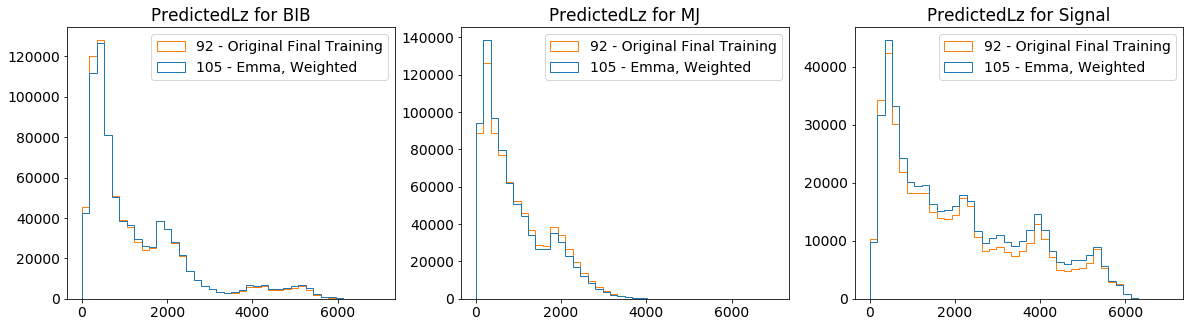

In [6]:
plot_variables('PredictedLz')
plt.show()

C:\Users\gordo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


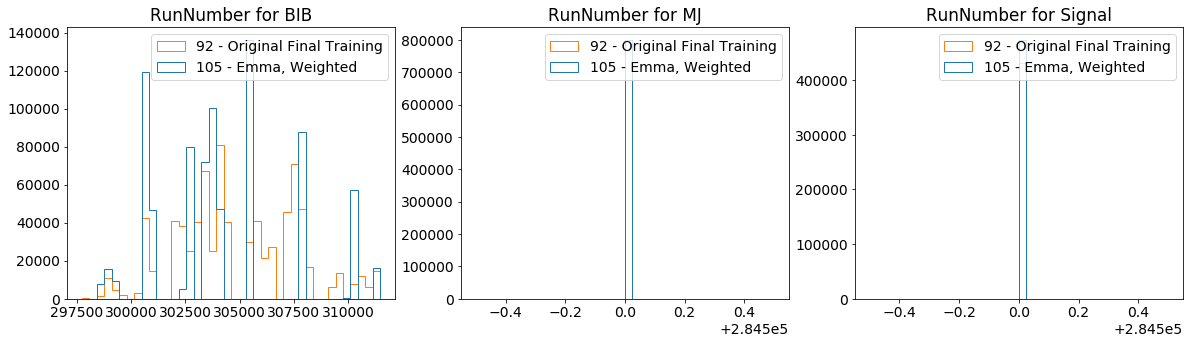

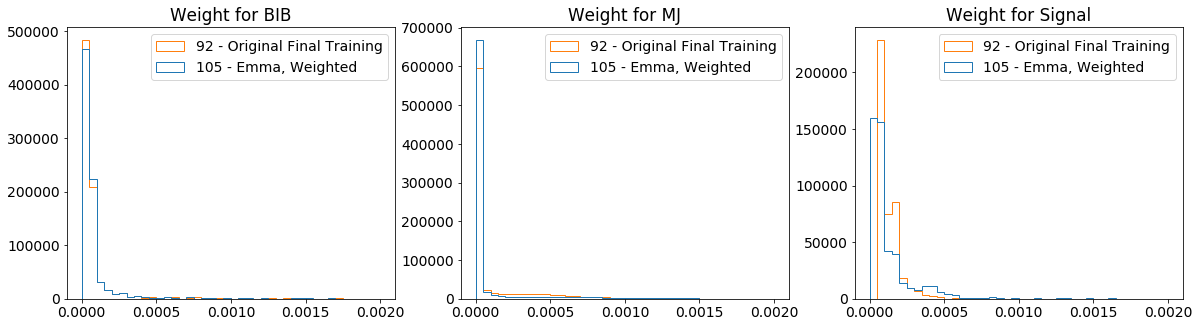

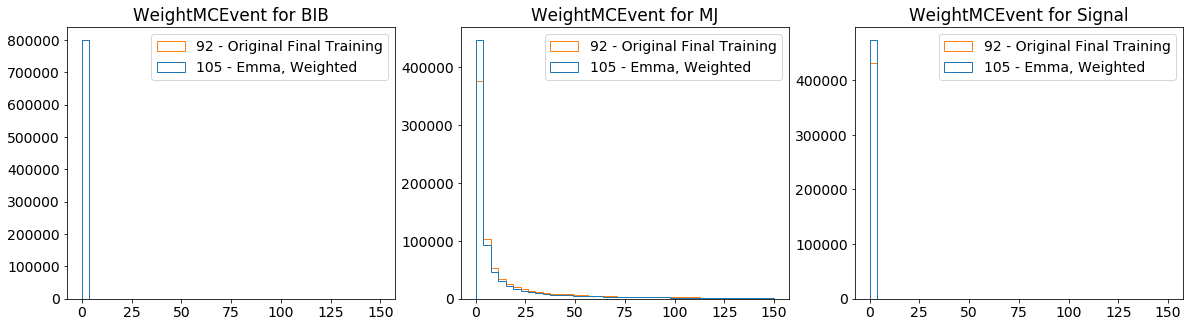

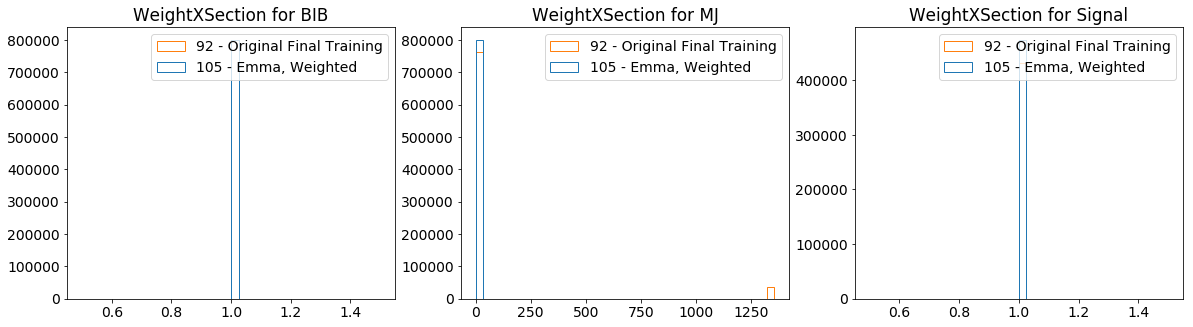

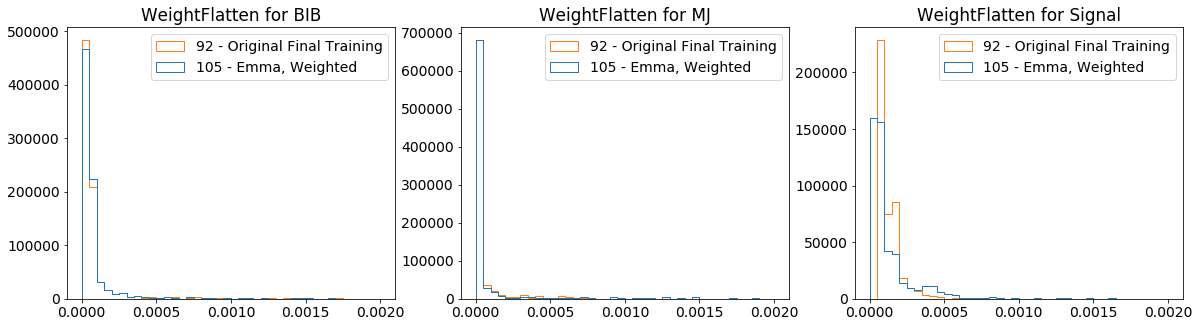

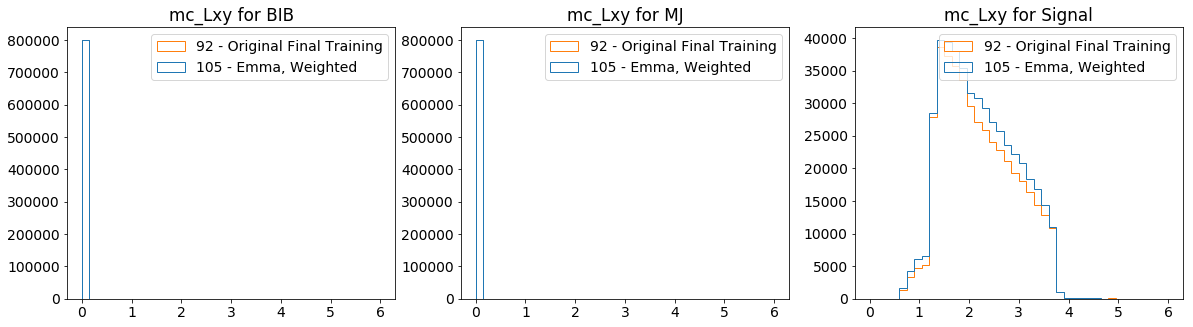

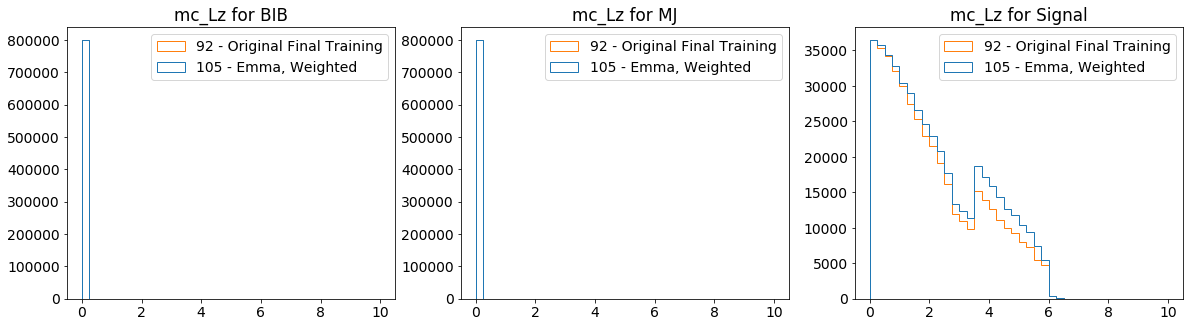

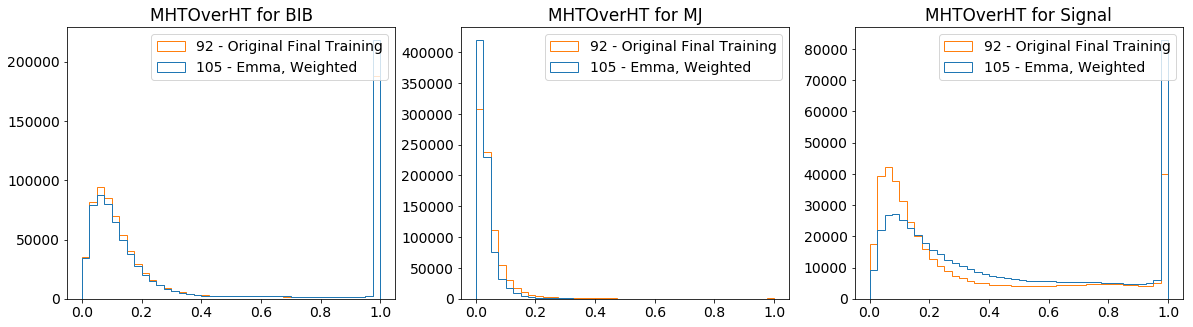

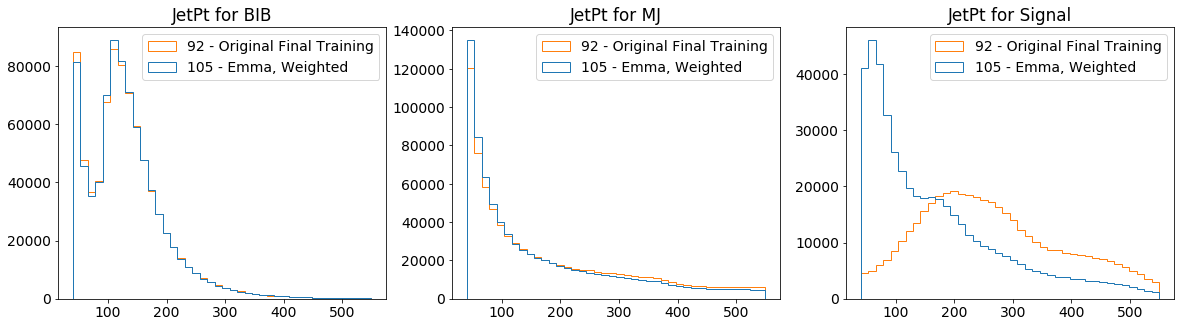

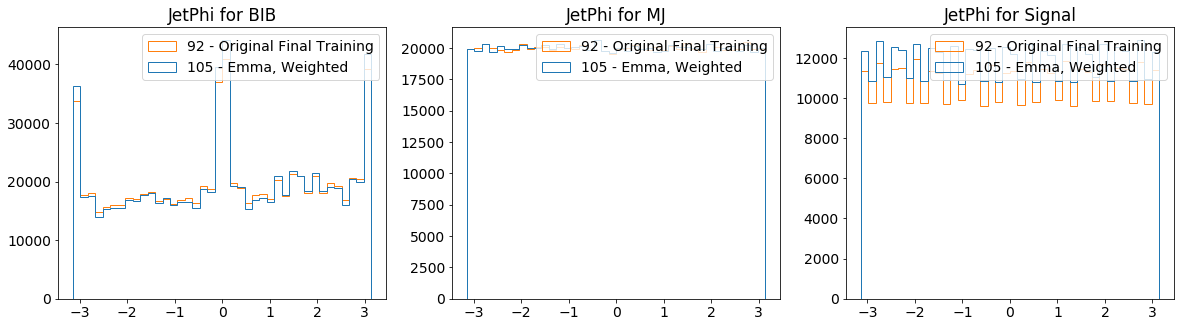

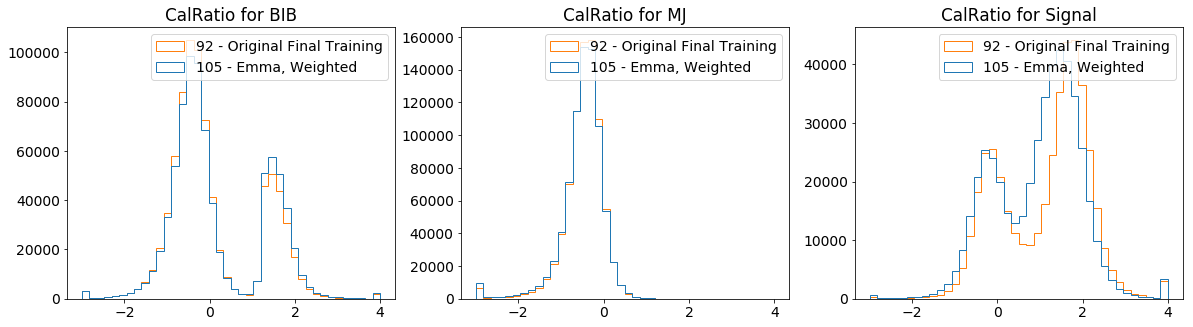

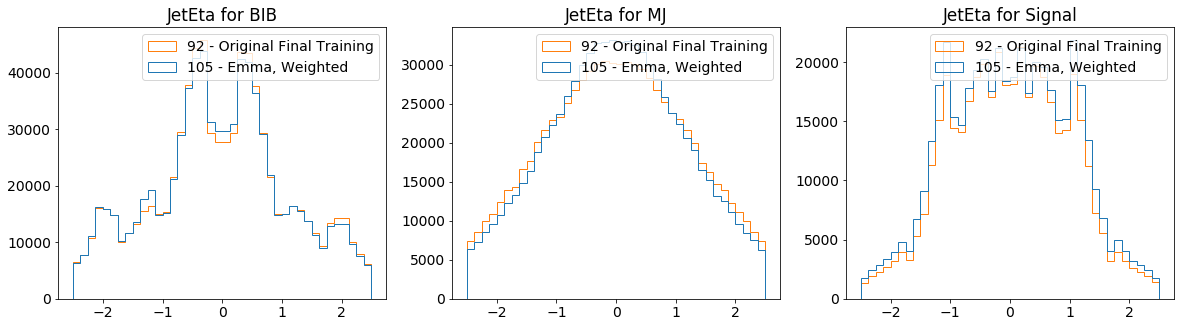

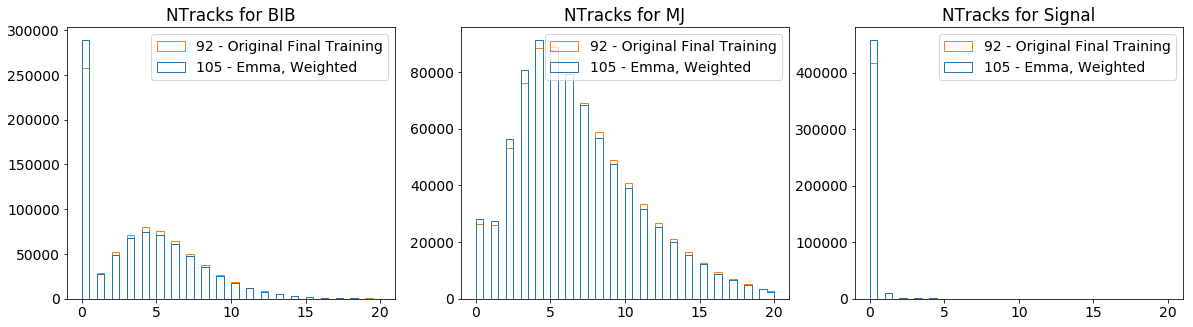

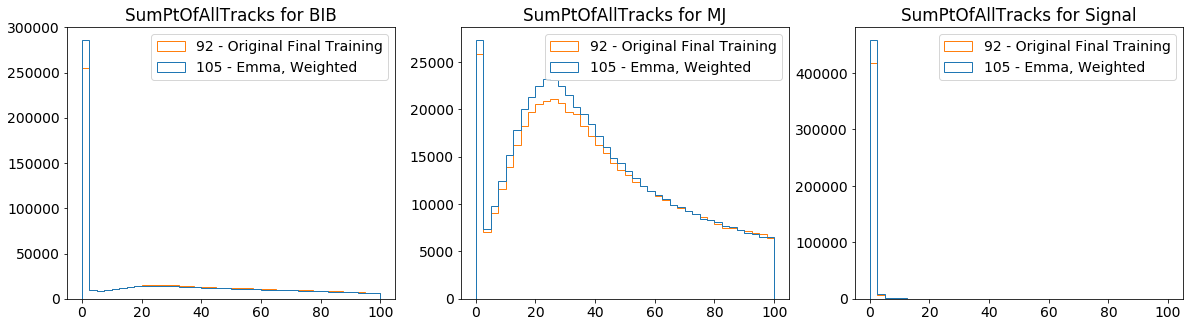

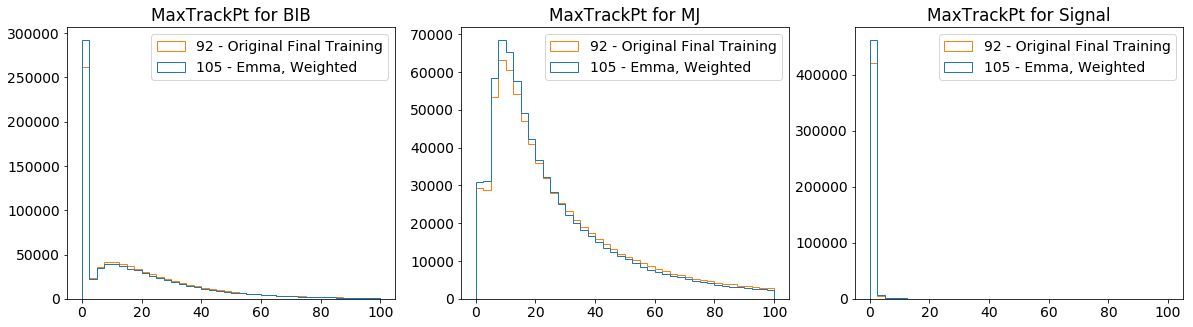

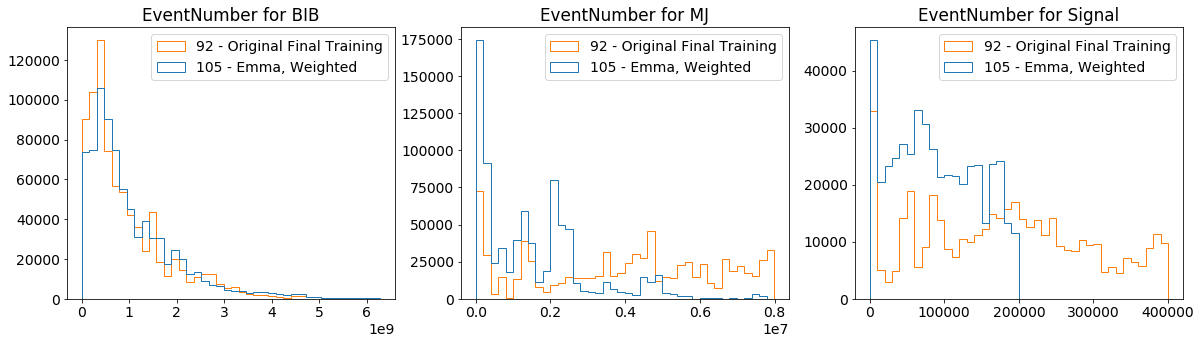

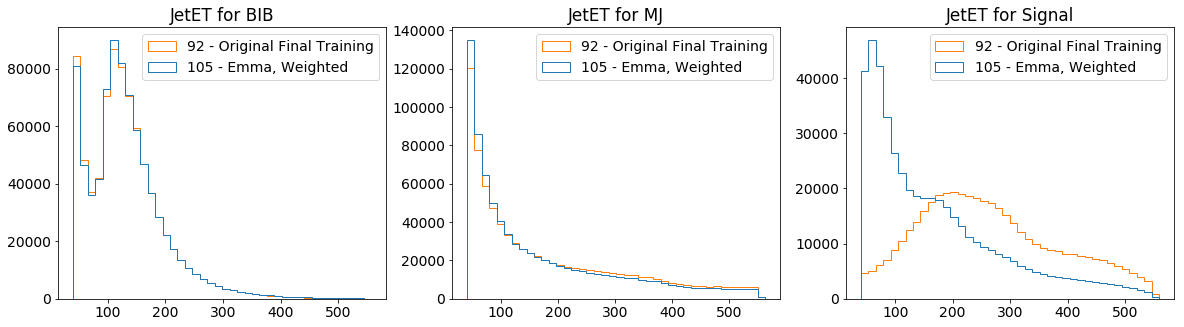

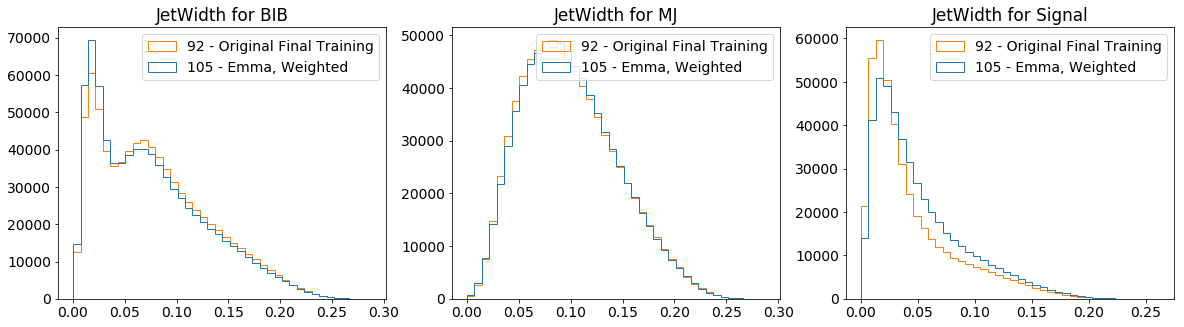

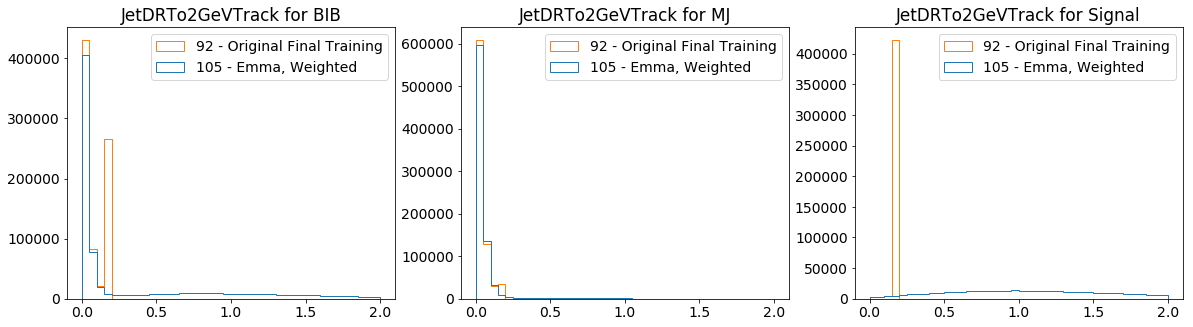

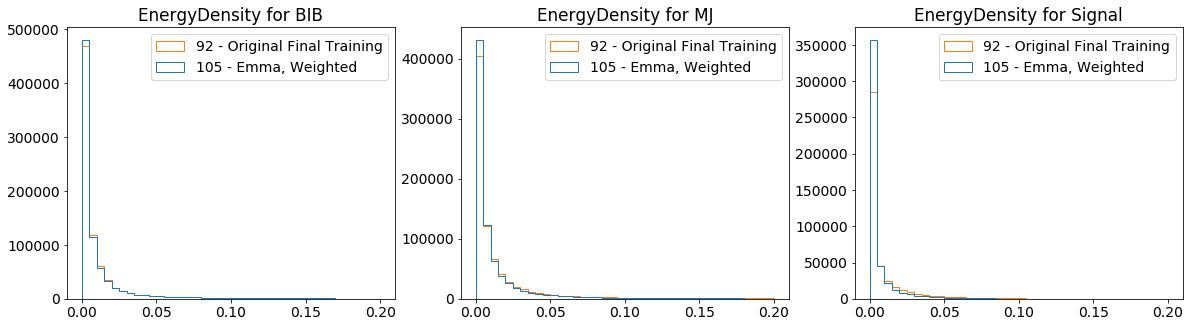

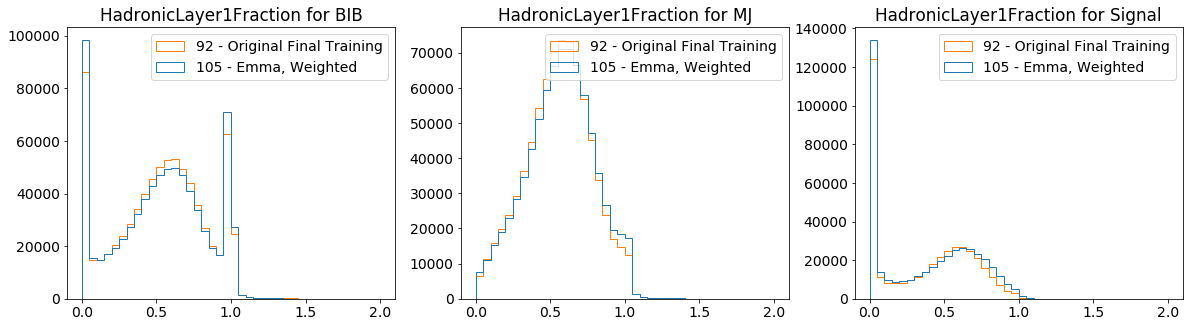

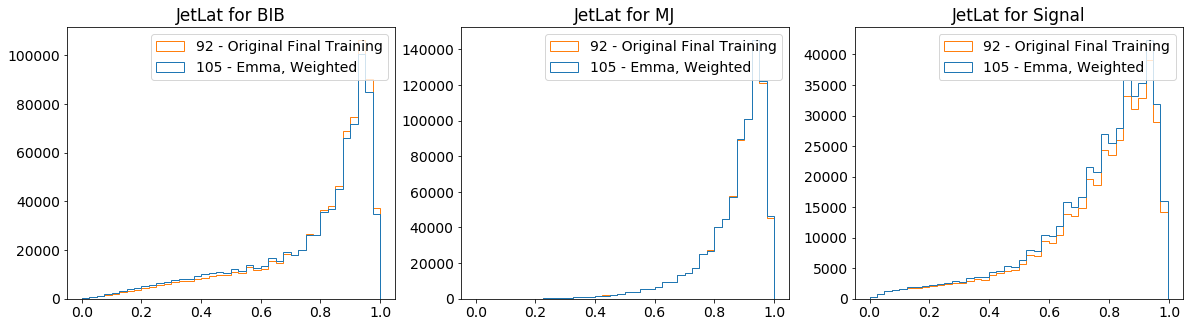

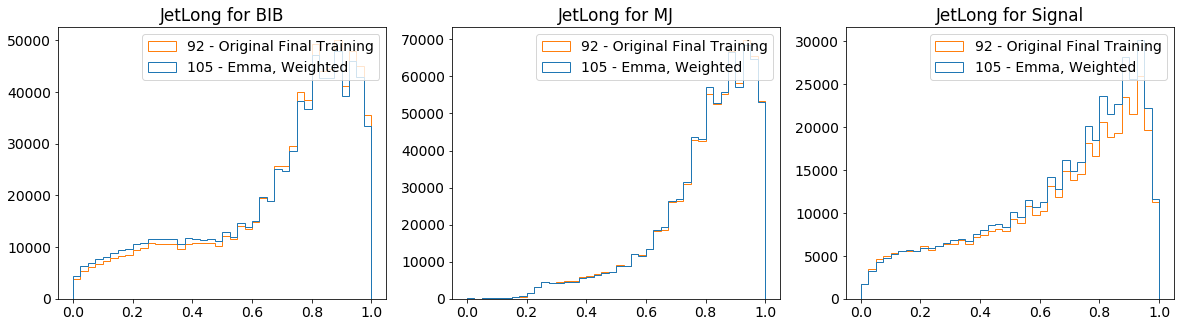

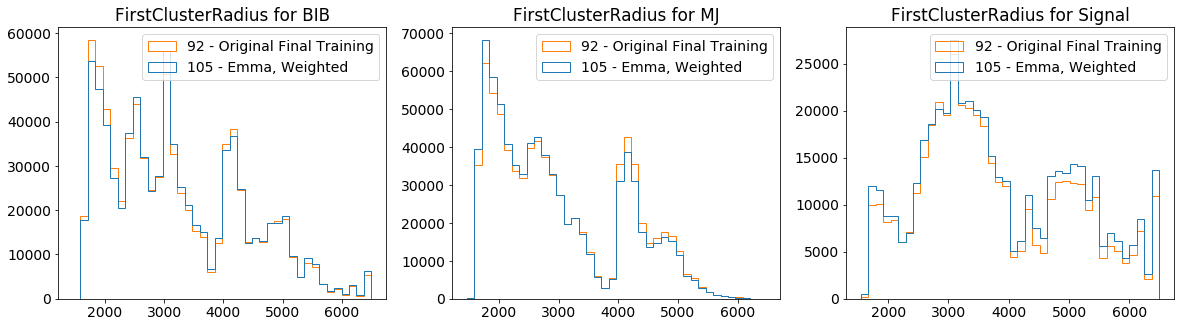

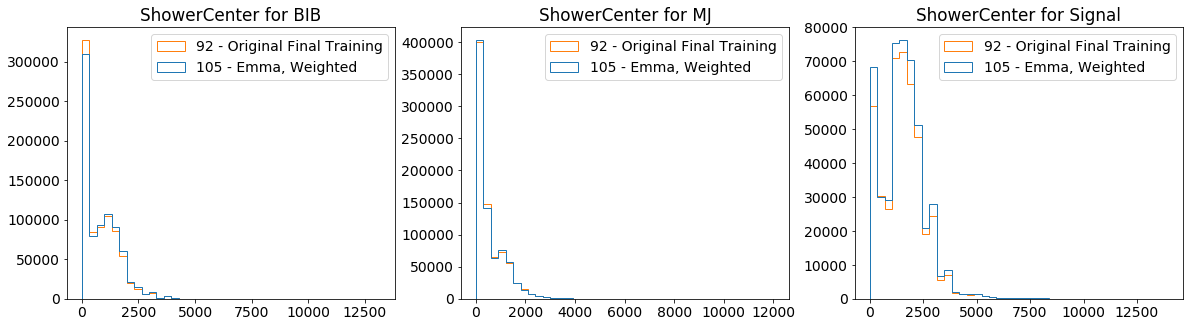

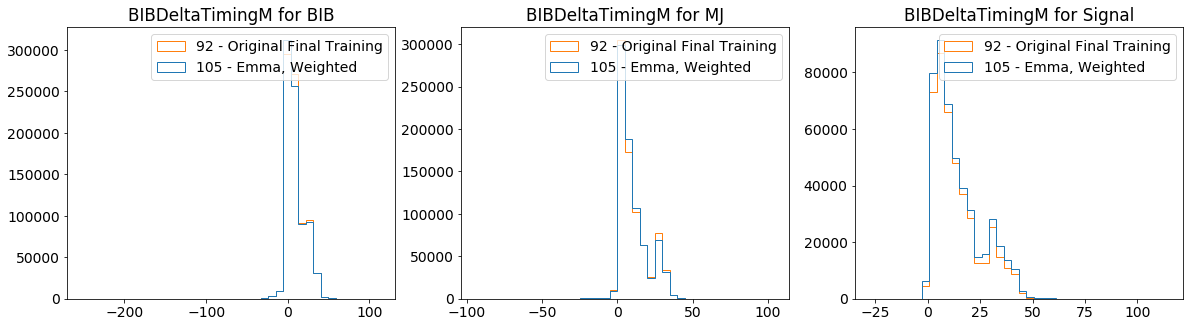

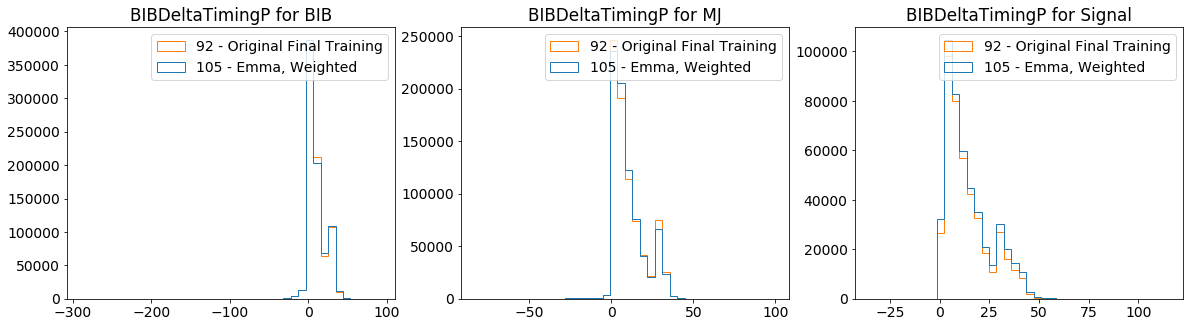

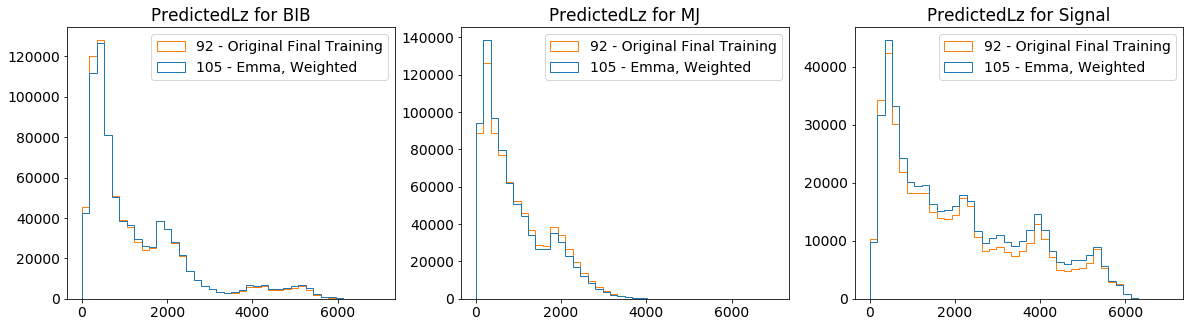

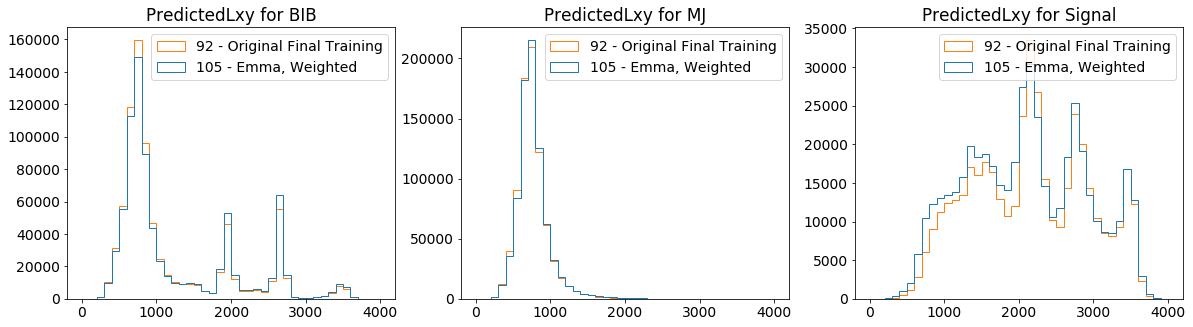

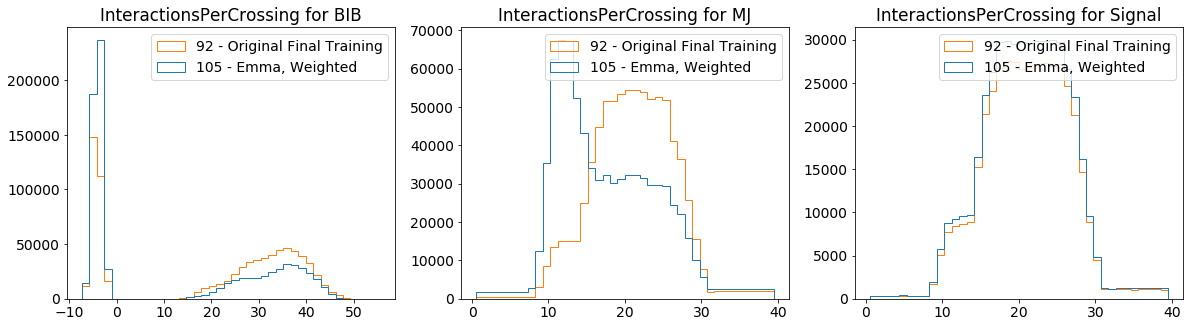

In [7]:
for v in samples[92][0].columns:
    plot_variables(v)
    plt.show()